Data Collection

In [3]:
#Importing rvest library
#Rvest library enables one to scrape webpages
#Checking if package is installed
require("rvest")
#Importing package
library(rvest)

Loading required package: rvest



In [4]:
#Extracting "bike sharing system" HTML table from Wiki page and turn it into a data frame
url <- "https://en.wikipedia.org/wiki/List_of_bicycle-sharing_systems"

#Read the HTML page
#downloads and parses the HTML (web code) of a web page
root_node <- read_html(url)

#Extracting all the tables
#looks inside the HTML and pulls out specific elements
table_nodes <- html_nodes(root_node, "table")

In [5]:
#Finding the table we want through a loop:
for(i in seq_along(table_nodes)) {
  cat("\nTable", i, "\n")
  print(html_table(table_nodes[[i]], fill = TRUE)[1:5, ])
}


Table 1 
# A tibble: 5 × 8
  Country   Country  `City / Region` Name  System Operator Launched Discontinued
  <chr>     <chr>    <chr>           <chr> <chr>  <chr>    <chr>    <chr>       
1 Albania   Albania  Tirana[5]       Ecov… ""     ""       March 2… "Discontinu…
2 Argentina Argenti… Buenos Aires[6… Ecob… "Sert… "Bike I… 2010     ""          
3 Argentina Argenti… Mendoza[10]     Metr… ""     ""       2014     ""          
4 Argentina Argenti… Rosario         Mi B… ""     ""       2 Decem… ""          
5 Argentina Argenti… San Lorenzo, S… Bici… "Bici… ""       27 Nove… ""          

Table 2 
# A tibble: 5 × 10
  .mw-parser-output .navb…¹ .mw-parser-output .n…² ``    ``    ``    ``    ``   
  <chr>                     <chr>                  <chr> <chr> <chr> <chr> <chr>
1 List of bicycle-sharing … "List of bicycle-shar… NA     NA   NA     NA   NA   
2 Asia                      "East Asia\nAnywheel … East… "Any… Sout… "JoB… West…
3 East Asia                 "Anywheel (Singapore)… N

In [6]:
#Converting wanted table into a dataframe
bike_sharing_df <- html_table(table_nodes[[1]], fill = TRUE)

head(bike_sharing_df)

Country,Country,City / Region,Name,System,Operator,Launched,Discontinued
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Albania,Albania,Tirana[5],Ecovolis,,,March 2011,Discontinued
Argentina,Argentina,Buenos Aires[6][7],Ecobici,Serttel Brasil[8],Bike In Baires Consortium[9],2010,
Argentina,Argentina,Mendoza[10],Metrobici,,,2014,
Argentina,Argentina,Rosario,Mi Bici Tu Bici[11],,,2 December 2015,
Argentina,Argentina,"San Lorenzo, Santa Fe",Biciudad,Biciudad,,27 November 2016,
Australia,Australia,Melbourne[12],Melbourne Bike Share,PBSC & 8D,Motivate,June 2010,30 November 2019[13]


In [7]:
#summarizing the tibble
summary(bike_sharing_df)

   Country            Country          City / Region          Name          
 Length:889         Length:889         Length:889         Length:889        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    System            Operator           Launched         Discontinued      
 Length:889         Length:889         Length:889         Length:889        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

In [8]:
#for a nicer summary
#install.packages("skimr", dependencies = TRUE)
#library(skimr)
# Create a small test dataframe
# test_df <- data.frame(
#   a = 1:5,
#   b = c("x", "y", "x", "z", "y")
# )

# print(skim(test_df))
#print(skim(bike_sharing_df))
str(bike_sharing_df)
#However skimr does not work for non numeric values and may also crash because of complex data types/incompatibility with dplyr

tibble [889 × 8] (S3: tbl_df/tbl/data.frame)
 $ Country      : chr [1:889] "Albania" "Argentina" "Argentina" "Argentina" ...
 $ Country      : chr [1:889] "Albania" "Argentina" "Argentina" "Argentina" ...
 $ City / Region: chr [1:889] "Tirana[5]" "Buenos Aires[6][7]" "Mendoza[10]" "Rosario" ...
 $ Name         : chr [1:889] "Ecovolis" "Ecobici" "Metrobici" "Mi Bici Tu Bici[11]" ...
 $ System       : chr [1:889] "" "Serttel Brasil[8]" "" "" ...
 $ Operator     : chr [1:889] "" "Bike In Baires Consortium[9]" "" "" ...
 $ Launched     : chr [1:889] "March 2011" "2010" "2014" "2 December 2015" ...
 $ Discontinued : chr [1:889] "Discontinued" "" "" "" ...


In [9]:
#Exporting Data Frame as CSV
write.csv(bike_sharing_df, "raw_bike_sharing_systems.csv", row.names = FALSE)

In [10]:
# Download raw_bike_sharing_systems.csv
url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_bike_sharing_systems.csv"
download.file(url, destfile = "raw_bike_sharing_systems.csv")

In [11]:
#Getting current weather data for a city using OpenWeather API

#making HTTP request to current weather API
library(httr) #Enables workinng in R w HTTP requests
weather_url <- 'https://api.openweathermap.org/data/2.5/weather'
your_api_key <- "ff51a1f993d1b967b4ac09208f29a2ef"
current_query <- list(q = "Seoul", appid = your_api_key, units = "metrics")

In [12]:
#checking response type (JSON Format)
response <- GET(weather_url, query = current_query)

#checking response type
http_type(response)

#Parsing it as named list in R
json_result <- content(response, as = "parsed")

#To view as a R List object
class(json_result)

#printing result
json_result

[1] "application/json"

[1] "list"

$coord
$coord$lon
[1] 126.9778

$coord$lat
[1] 37.5683


$weather
$weather[[1]]
$weather[[1]]$id
[1] 800

$weather[[1]]$main
[1] "Clear"

$weather[[1]]$description
[1] "clear sky"

$weather[[1]]$icon
[1] "01n"



$base
[1] "stations"

$main
$main$temp
[1] 292.91

$main$feels_like
[1] 292.72

$main$temp_min
[1] 292.91

$main$temp_max
[1] 293.93

$main$pressure
[1] 1013

$main$humidity
[1] 68

$main$sea_level
[1] 1013

$main$grnd_level
[1] 1004


$visibility
[1] 10000

$wind
$wind$speed
[1] 1.54

$wind$deg
[1] 200


$clouds
$clouds$all
[1] 0


$dt
[1] 1749650594

$sys
$sys$type
[1] 1

$sys$id
[1] 8105

$sys$country
[1] "KR"

$sys$sunrise
[1] 1749586226

$sys$sunset
[1] 1749639188


$timezone
[1] 32400

$id
[1] 1835848

$name
[1] "Seoul"

$cod
[1] 200

In [13]:
#converting named list to data frame
#creating empty vectors to hols data temporarily
weather <- c()
visibility <- c()
temp <- c()
temp_min <- c()
temp_max <- c()
pressure <- c()
humidity <- c()
wind_speed <- c()
wind_deg <- c()

In [14]:
#assiging values in json_result into diff vectors
weather <- c(weather, json_result$weather[[1]]$main)
# Get Visibility
visibility <- c(visibility, json_result$visibility)
# Get current temperature
temp <- c(temp, json_result$main$temp)
# Get min temperature
temp_min <- c(temp_min, json_result$main$temp_min)
# Get max temperature
temp_max <- c(temp_max, json_result$main$temp_max)
# Get pressure
pressure <- c(pressure, json_result$main$pressure)
# Get humidity
humidity <- c(humidity, json_result$main$humidity)
# Get wind speed
wind_speed <- c(wind_speed, json_result$wind$speed)
# Get wind direction
wind_deg <- c(wind_deg, json_result$wind$deg)

In [15]:
#combining all vectors as columns of a data frame
weather_data_frame <- data.frame(weather=weather,
                                 visibility=visibility,
                                 temp=temp,
                                 temp_min=temp_min,
                                 temp_max=temp_max,
                                 pressure=pressure,
                                 humidity=humidity,
                                 wind_speed=wind_speed,
                                 wind_deg=wind_deg)

In [16]:
#Check generated data frame
print(weather_data_frame)

  weather visibility   temp temp_min temp_max pressure humidity wind_speed
1   Clear      10000 292.91   292.91   293.93     1013       68       1.54
  wind_deg
1      200


In [17]:
write.csv(weather_data_frame, "raw_seoul_bike_sharing.csv", row.names = FALSE)

In [18]:
library(httr)
library(readr)

your_api_key <- "ff51a1f993d1b967b4ac09208f29a2ef"

city_weather_forecast <- function(city_names){
  df <- data.frame()

  for(city_name in city_names){
    forecast_url <- 'https://api.openweathermap.org/data/2.5/forecast'
    current_query <- list(q = city_name, appid = your_api_key, units = "metric")

    response <- GET(forecast_url, query = current_query)
    cat("Calling forecast for:", city_name, "| Status:", status_code(response), "\n")

    json_list <- content(response, as = "parsed")

    # Check and extract forecast data
    if (!is.null(json_list$list)) {
      for (result in json_list$list) {
        dt_txt <- result$dt_txt
        temp <- result$main$temp
        humidity <- result$main$humidity
        weather <- result$weather[[1]]$main

        # Append row to data frame
        df <- rbind(df, data.frame(
          city = city_name,
          dt_txt = dt_txt,
          temp = temp,
          humidity = humidity,
          weather = weather,
          stringsAsFactors = FALSE
        ))
      }
    } else {
      message("No forecast data found for ", city_name)
    }
  }

  return(df)
}

# Call function and save output
cities <- c("Seoul", "Paris", "Washington", "Suzhou")
cities_weather_df <- city_weather_forecast(cities)

# Check if data frame is actually populated
print(head(cities_weather_df))
print(nrow(cities_weather_df))  # Should be > 0

# ✅ Save to CSV correctly
write_csv(cities_weather_df, "cities_weather_forecast.csv")



Attaching package: ‘readr’


The following object is masked from ‘package:rvest’:

    guess_encoding


The following object is masked from ‘package:yardstick’:

    spec




Calling forecast for: Seoul | Status: 200 
Calling forecast for: Paris | Status: 200 
Calling forecast for: Washington | Status: 200 
Calling forecast for: Suzhou | Status: 200 
   city              dt_txt  temp humidity weather
1 Seoul 2025-06-11 15:00:00 19.76       68   Clear
2 Seoul 2025-06-11 18:00:00 19.65       65  Clouds
3 Seoul 2025-06-11 21:00:00 19.29       62  Clouds
4 Seoul 2025-06-12 00:00:00 22.93       45  Clouds
5 Seoul 2025-06-12 03:00:00 28.96       29  Clouds
6 Seoul 2025-06-12 06:00:00 33.44       22  Clouds
[1] 160


In [19]:
# Download some general city information such as name and locations
url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_worldcities.csv"
# download the file
download.file(url, destfile = "raw_worldcities.csv")

Data Wrangling

In [20]:
#Standardize column names for collected datasets
#Remove undesired reference links from scraped bike sharing systems datasets
#Extract numeric value from undesired text annotations

#collected datasets:
#cities_weather_forecast.csv: 5-day weather forecasts for a list of cities
#raw_bike_sharing_systems.csv: list of active bike-sharing systems across the world
#raw_worldcities.csv
#raw_seoul_bike_sharing.csv

In [21]:
library(tidyverse)
library(readr)  #for read_csv
library(stringr) #for replacing "_" with " "

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
✖ readr::spec()           masks yardstick::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [22]:
dataset_list <- c(
    'cities_weather_forecast.csv',
    'raw_bike_sharing_systems.csv',
    'raw_worldcities.csv',
    'raw_seoul_bike_sharing.csv'
    )

#writing a for loop to iterate datasets and col names
#turning all col names to uppercase
#replacing all spacs w underscores
#save cleaned dataset

for (dataset_name in dataset_list) {
  #read the dataset
  dataset <- read.csv(dataset_name)

  #convert col_names to uppercase
  colnames(dataset) <- toupper(colnames(dataset))

  #replace " " with "_"
  colnames(dataset) <- str_replace_all(colnames(dataset), "\\s+", "_")

  #save cleaned dataset
  write.csv(dataset, dataset_name, row.names = FALSE)
}


In [23]:
#Checking data in each csv
#eadLines("raw_bike_sharing_systems.csv", n = 5)
#readLines("raw_seoul_bike_sharing.csv", n = 5)
#readLines("cities_weather_forecast.csv", n = 5)
#readLines("raw_worldcities.csv", n = 5)

In [24]:
#summarizing each dataset
for (dataset_name in dataset_list) {
  dataset <- read.csv(dataset_name)

  cat("\nSummary of:", dataset_name, "\n")

  print(colnames(dataset))

  print(summary(dataset))
}


Summary of: cities_weather_forecast.csv 
[1] "CITY"     "DT_TXT"   "TEMP"     "HUMIDITY" "WEATHER" 
     CITY              DT_TXT               TEMP          HUMIDITY    
 Length:160         Length:160         Min.   : 8.79   Min.   :17.00  
 Class :character   Class :character   1st Qu.:20.54   1st Qu.:40.00  
 Mode  :character   Mode  :character   Median :23.59   Median :58.00  
                                       Mean   :23.39   Mean   :58.28  
                                       3rd Qu.:27.31   3rd Qu.:76.00  
                                       Max.   :33.44   Max.   :96.00  
   WEATHER         
 Length:160        
 Class :character  
 Mode  :character  
                   
                   
                   

Summary of: raw_bike_sharing_systems.csv 
 [1] "COUNTRY"         "CITY"            "NAME"            "SYSTEM"         
 [5] "OPERATOR"        "LAUNCHED"        "DISCONTINUED"    "STATIONS"       
 [9] "BICYCLES"        "DAILY_RIDERSHIP"
   COUNTRY              

In [25]:
bike_sharing_df <- read_csv("raw_bike_sharing_systems.csv")
head(bike_sharing_df)

Rows: 480 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): COUNTRY, CITY, NAME, SYSTEM, OPERATOR, LAUNCHED, DISCONTINUED, STA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


COUNTRY,CITY,NAME,SYSTEM,OPERATOR,LAUNCHED,DISCONTINUED,STATIONS,BICYCLES,DAILY_RIDERSHIP
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Albania,Tirana,Ecovolis,NA,NA,March 2011,NA,8,200,NA
Argentina,Mendoza,Metrobici,NA,NA,2014,NA,2,40,NA
Argentina,"San Lorenzo, Santa Fe",Biciudad,Biciudad,NA,27 November 2016,NA,8,80,NA
Argentina,Buenos Aires,Ecobici,Serttel Brasil,Bike In Baires Consortium.[10],2010,NA,400,4000,21917
Argentina,Rosario,Mi Bici Tu Bici[11],NA,NA,2 December 2015,NA,47,480,NA
Australia,Melbourne[12],Melbourne Bike Share,PBSC & 8D,Motivate,June 2010,30 November 2019[13],53,676,NA


In [26]:
#focusing only on specific 4 columns
#colnames(bike_sharing_df)
sub_bike_sharing_df <- bike_sharing_df %>%
                             select(COUNTRY, CITY, SYSTEM, BICYCLES)

In [27]:
sub_bike_sharing_df %>%
      summarise_all(class) %>%
            gather(variable, class)

variable,class
<chr>,<chr>
COUNTRY,character
CITY,character
SYSTEM,character
BICYCLES,character


In [28]:
#removing references from all columns
sub_bike_sharing_df <- sub_bike_sharing_df %>%
  mutate(
    COUNTRY = str_remove_all(COUNTRY, "\\[[A-z0-9]+\\]"),
    CITY = str_remove_all(CITY, "\\[[A-z0-9]+\\]"),
    SYSTEM = str_remove_all(SYSTEM, "\\[[A-z0-9]+\\]"),
    BICYCLES = str_remove_all(BICYCLES, "\\[[A-z0-9]+\\]")
  )

In [29]:
head(sub_bike_sharing_df, 10)

COUNTRY,CITY,SYSTEM,BICYCLES
<chr>,<chr>,<chr>,<chr>
Albania,Tirana,NA,200
Argentina,Mendoza,NA,40
Argentina,"San Lorenzo, Santa Fe",Biciudad,80
Argentina,Buenos Aires,Serttel Brasil,4000
Argentina,Rosario,NA,480
Australia,Melbourne,PBSC & 8D,676
Australia,Brisbane,3 Gen. Cyclocity,2000
Australia,Melbourne,4 Gen. oBike,1250
Australia,Sydney,4 Gen. oBike,1250


In [30]:
#cleaning bicycles to retain only numbers:
sub_bike_sharing_df <- sub_bike_sharing_df %>%
  mutate(
  BICYCLES = str_extract(BICYCLES, "[0-9]+"),
  BICYCLES = as.numeric(BICYCLES)
  )

In [31]:
head(sub_bike_sharing_df, 10)

COUNTRY,CITY,SYSTEM,BICYCLES
<chr>,<chr>,<chr>,<dbl>
Albania,Tirana,NA,200
Argentina,Mendoza,NA,40
Argentina,"San Lorenzo, Santa Fe",Biciudad,80
Argentina,Buenos Aires,Serttel Brasil,4000
Argentina,Rosario,NA,480
Australia,Melbourne,PBSC & 8D,676
Australia,Brisbane,3 Gen. Cyclocity,2000
Australia,Melbourne,4 Gen. oBike,1250
Australia,Sydney,4 Gen. oBike,1250


In [32]:
#removing undesired reference links using regex
library(stringr)
library(dplyr)
# remove_ref <- function(string) {
#   str_replace_all(strings, "\\[[A-z0-9]+\\]", "")
# }

remove_ref <- function(x) {
  stringr::str_replace_all(x, "\\[[A-z0-9]+\\]", "")
}

In [33]:
#custom function using stringr::str_replace_all to replace all
#reference links with an empty character for columns CITY and SYSTEM
sub_bike_sharing_df <- sub_bike_sharing_df %>%
  dplyr::mutate(
    CITY = remove_ref(CITY),
    SYSTEM = remove_ref(SYSTEM)
  )

In [34]:
#verifying
ref_pattern <- "\\[[A-z0-9]+\\]"
find_ref_pattern <- function(strings) grepl(ref_pattern, strings)

sub_bike_sharing_df %>%
  filter(find_ref_pattern(CITY)) %>%
  slice(1:10)

sub_bike_sharing_df %>%
  filter(find_ref_pattern(SYSTEM)) %>%
  slice(1:10)


COUNTRY,CITY,SYSTEM,BICYCLES
<chr>,<chr>,<chr>,<dbl>


COUNTRY,CITY,SYSTEM,BICYCLES
<chr>,<chr>,<chr>,<dbl>


Data Wrangling with dplyr

In [35]:
#Detect and handle missing values
#Create indicator (dummy) variables for categorical variables
#Normalize data

In [36]:
library(tidyverse)
url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_seoul_bike_sharing.csv"
download.file(url, destfile = "raw_seoul_bike_sharing.csv")
bike_sharing_df <- read_csv("raw_seoul_bike_sharing.csv")
summary(bike_sharing_df)
dim(bike_sharing_df)

Rows: 8760 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Date, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, Hour, TEMPERATURE, HUMIDITY, WIND_SPEED, Visibi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


     Date           RENTED_BIKE_COUNT      Hour        TEMPERATURE    
 Length:8760        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 5.75   1st Qu.:  3.40  
 Mode  :character   Median : 542.0    Median :11.50   Median : 13.70  
                    Mean   : 729.2    Mean   :11.50   Mean   : 12.87  
                    3rd Qu.:1084.0    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
                    NA's   :295                       NA's   :11      
    HUMIDITY       WIND_SPEED      Visibility   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.

[1] 8760   14

In [37]:
#Detect and handle missing values
#dropping empty rented_bike_count rows
library(dplyr)
bike_sharing_df <- bike_sharing_df %>%
  filter(!is.na(RENTED_BIKE_COUNT))

#temperature column
#checking missing values
bike_sharing_df %>%
  filter(!is.na(TEMPERATURE))

Date,RENTED_BIKE_COUNT,Hour,TEMPERATURE,HUMIDITY,WIND_SPEED,Visibility,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,Snowfall,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,Winter,No Holiday,Yes
01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,Winter,No Holiday,Yes


In [38]:
#Calculate the summer avg temp
library(dplyr)
#Calculate the summer average temperature
summer_avg_temp <- bike_sharing_df %>%
  filter(SEASONS == "Summer") %>%
  summarize(avg_temp = mean(TEMPERATURE, na.rm = TRUE)) %>%
  pull(avg_temp)

#Impute missing Temp values with summer average
bike_sharing_df <- bike_sharing_df %>%
  mutate(TEMPERATURE = ifelse(is.na(TEMPERATURE), summer_avg_temp, TEMPERATURE))

In [39]:
#summry to check no missing values remain
summary(bike_sharing_df)
write.csv(bike_sharing_df, "seoul_bike_sharing_converted.csv", row.names = FALSE)

     Date           RENTED_BIKE_COUNT      Hour        TEMPERATURE    
 Length:8465        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 6.00   1st Qu.:  3.00  
 Mode  :character   Median : 542.0    Median :12.00   Median : 13.50  
                    Mean   : 729.2    Mean   :11.51   Mean   : 12.77  
                    3rd Qu.:1084.0    3rd Qu.:18.00   3rd Qu.: 22.70  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    HUMIDITY       WIND_SPEED      Visibility   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      
 SOLAR_RADIAT

In [40]:
#Normalization
#using min max formula for all elements
#(x-min(x)) / (max(x) - min(x))

#create a vector of column names to normalize
#use mutate(across(...)) to apply normalization to each column
#save normalized data set

#Listing numeric values to normalize cols
num_cols <- c("RENTED_BIKE_COUNT", "TEMPERATURE", "HUMIDITY",
              "WIND_SPEED", "Visibility", "DEW_POINT_TEMPERATURE",
              "SOLAR_RADIATION", "RAINFALL", "Snowfall")

#Apply min-max normalization
bike_sharing_normalized <- bike_sharing_df %>%
  mutate(across(all_of(num_cols), ~(.-min(., na.rm = TRUE)) /
                                    (max(., na.rm = TRUE) - min(., na.rm = TRUE))))

summary(bike_sharing_normalized)

write_csv(bike_sharing_normalized, "seoul_bike_sharing_converted_normalized.csv")

     Date           RENTED_BIKE_COUNT      Hour        TEMPERATURE    
 Length:8465        Min.   :0.00000   Min.   : 0.00   Min.   :0.0000  
 Class :character   1st Qu.:0.05965   1st Qu.: 6.00   1st Qu.:0.3636  
 Mode  :character   Median :0.15194   Median :12.00   Median :0.5472  
                    Mean   :0.20460   Mean   :11.51   Mean   :0.5345  
                    3rd Qu.:0.30445   3rd Qu.:18.00   3rd Qu.:0.7080  
                    Max.   :1.00000   Max.   :23.00   Max.   :1.0000  
    HUMIDITY        WIND_SPEED       Visibility     DEW_POINT_TEMPERATURE
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000       
 1st Qu.:0.4286   1st Qu.:0.1216   1st Qu.:0.4602   1st Qu.:0.4412       
 Median :0.5816   Median :0.2027   Median :0.8429   Median :0.6107       
 Mean   :0.5933   Mean   :0.2332   Mean   :0.7131   Mean   :0.5977       
 3rd Qu.:0.7551   3rd Qu.:0.3108   3rd Qu.:1.0000   3rd Qu.:0.7924       
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   

In [41]:
#Standardize the col names for new datasets
library(stringr)
#looping through multiple datasets
dataset_list <- c('raw_seoul_bike_sharing.csv',
                  'seoul_bike_sharing_converted.csv',
                  'seoul_bike_sharing_converted_normalized.csv'
                  )

#for for each element in dataset
for (dataset_name in dataset_list) {
  dataset <- read_csv(dataset_name)
  names(dataset) <- toupper(names(dataset))
  names(dataset) <- str_replace_all(names(dataset), " ", "_")
  write.csv(dataset, dataset_name, row.names = FALSE)
}

Rows: 8760 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Date, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, Hour, TEMPERATURE, HUMIDITY, WIND_SPEED, Visibi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8465 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Date, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, Hour, TEMPERATURE, HUMIDITY, WIND_SPEED, Visibi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8465 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Date, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_C

EDA with SQLite

In [42]:
#loading libraries
library(DBI)
install.packages("RSQLite")
library(RSQLite)

#connecting to a database
con <- dbConnect(RSQLite::SQLite())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
#Loading file into the database
seoul_bike_sharing <- read_csv("seoul_bike_sharing.csv")
cities_weather_forecast <- read_csv("cities_weather_forecast.csv")
bike_sharing_systems <- read_csv("bike_sharing_systems.csv")
world_cities <- read_csv("world_cities.csv")

Rows: 8465 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): DATE, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, HOUR, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 160 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): CITY, WEATHER
dbl  (2): TEMP, HUMIDITY
dttm (1): DT_TXT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 480 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): COUNTRY, CITY, SYSTEM
dbl (1): BICYCLES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the colum

In [44]:
#writing each dataframe to the database as a table
dbWriteTable(con, "SEOUL_BIKE_SHARING", seoul_bike_sharing, overwrite = TRUE)
dbWriteTable(con, "CITIES_WEATHER_FORECAST", cities_weather_forecast, overwrite = TRUE)
dbWriteTable(con, "BIKE_SHARING_SYSTEMS", bike_sharing_systems, overwrite = TRUE)
dbWriteTable(con, "WORLD_CITIES", world_cities, overwrite = TRUE)
#dbListTables(con)

In [45]:
names(seoul_bike_sharing)

[1] "DATE"                  "RENTED_BIKE_COUNT"     "HOUR"                 
 [4] "TEMPERATURE"           "HUMIDITY"              "WIND_SPEED"           
 [7] "VISIBILITY"            "DEW_POINT_TEMPERATURE" "SOLAR_RADIATION"      
[10] "RAINFALL"              "SNOWFALL"              "SEASONS"              
[13] "HOLIDAY"               "FUNCTIONING_DAY"

In [46]:
colnames(cities_weather_forecast)

[1] "CITY"     "DT_TXT"   "TEMP"     "HUMIDITY" "WEATHER"

In [47]:
colnames(bike_sharing_systems)

[1] "COUNTRY"  "CITY"     "SYSTEM"   "BICYCLES"

In [48]:
colnames(world_cities)

[1] "CITY"       "CITY_ASCII" "LAT"        "LNG"        "COUNTRY"   
 [6] "ISO2"       "ISO3"       "ADMIN_NAME" "CAPITAL"    "POPULATION"
[11] "ID"

In [49]:
#find other cities where total number of bikes in the system =15k-20k
dbGetQuery(con, "SELECT wc.CITY,
                        wc.COUNTRY,
                        wc.LAT,
                        wc.LNG,
                        wc.POPULATION,
                        SUM(CAST(bss.BICYCLES AS INTEGER)) AS total_bikes
                 FROM world_cities wc
                 JOIN bike_sharing_systems bss ON wc.CITY = bss.CITY
                 GROUP BY wc.CITY, wc.COUNTRY, wc.LAT, wc.LNG, wc.POPULATION
                 HAVING total_bikes BETWEEN 15000 AND 20000
                 ")

CITY,COUNTRY,LAT,LNG,POPULATION,total_bikes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
Beijing,China,39.9050,116.3914,19433000,16000
Milan,Italy,45.4669,9.1900,1351562,17000
Milan,United States,35.9126,-88.7554,7201,17000
Milan,United States,42.0816,-83.6853,7778,17000
Ningbo,China,29.8750,121.5492,7639000,15000
Seoul,"Korea, South",37.5833,127.0000,21794000,20000
Shanghai,China,31.1667,121.4667,22120000,19165
Weifang,China,36.7167,119.1000,9373000,20000
Zhuzhou,China,27.8407,113.1469,3855609,20000


In [50]:
#gather detailed city info about seoul -> world_cities
#no of bicycles in its bike sharing systems -> bss
#join both on basis of city col
dbGetQuery(con, "SELECT wc.CITY,
                        wc.COUNTRY,
                        wc.LAT,
                        wc.LNG,
                        wc.POPULATION,
                        bss.city,
                        SUM(CAST(bss.BICYCLES AS INTEGER)) AS total_bikes
                 FROM WORLD_CITIES wc
                 JOIN BIKE_SHARING_SYSTEMS bss ON wc.CITY = bss.CITY
                 WHERE wc.city = 'Seoul'
                 GROUP BY wc.CITY,
                          wc.COUNTRY,
                          wc.LAT,
                          wc.LNG,
                          wc.POPULATION")


CITY,COUNTRY,LAT,LNG,POPULATION,CITY,total_bikes
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
Seoul,"Korea, South",37.5833,127,21794000,Seoul,20000


In [51]:
#

In [52]:
dbGetQuery(con, "SELECT COUNT (*) AS record_count
                 FROM seoul_bike_sharing")

record_count
<int>
8465


In [53]:
#How many hours had non zero rented bike count
dbGetQuery(con, "SELECT COUNT(*) AS operational_hours
                 FROM seoul_bike_sharing
                 WHERE RENTED_BIKE_COUNT > 0")

operational_hours
<int>
8465


In [54]:
#next 3 hours, query weather forecast for seoul
dbGetQuery(con, "SELECT weather
                 FROM cities_weather_forecast
                 WHERE CITY LIKE 'seoul'
                 ORDER BY 'date', 'hour'
                 LIMIT 1")

WEATHER
<chr>
Clear


In [55]:
#Seasons in bike sharing dataset
dbGetQuery(con, "SELECT DISTINCT SEASONS
                 FROM seoul_bike_sharing")

SEASONS
<chr>
Winter
Spring
Summer
Autumn


In [56]:
#First and last dates in SBS dataset
dbGetQuery(con, "SELECT max(DATE),
                        min(DATE)
                 FROM seoul_bike_sharing")

max(DATE),min(DATE)
<chr>,<chr>
31/12/2017,01/01/2018


In [57]:
#determine which date and hour had the most bike rentals
dbGetQuery(con, "SELECT DATE,
                        HOUR,
                        RENTED_BIKE_COUNT
                 FROM seoul_bike_sharing
                 ORDER BY RENTED_BIKE_COUNT DESC
                 LIMIT 5")

DATE,HOUR,RENTED_BIKE_COUNT
<chr>,<dbl>,<dbl>
19/06/2018,18,3556
21/06/2018,18,3418
12/06/2018,18,3404
20/06/2018,18,3384
04/06/2018,18,3380


In [58]:
#avg hourly temp and avg no. of bike rentals/hour each season
dbGetQuery(con, "SELECT SEASONS, HOUR,
                        avg(TEMPERATURE) as avg_temp,
                        avg(RENTED_BIKE_COUNT) as avg_count
                 FROM seoul_bike_sharing
                 GROUP BY SEASONS, HOUR
                 ORDER BY avg_count
                 LIMIT 10
                 ")

SEASONS,HOUR,avg_temp,avg_count
<chr>,<dbl>,<dbl>,<dbl>
Winter,4,-4.564444,50.47778
Winter,5,-4.803333,51.22222
Winter,3,-4.363333,77.81111
Winter,6,-5.031111,92.82222
Spring,4,9.694444,108.22222
Spring,5,9.453333,116.17778
Winter,2,-4.174444,117.78889
Winter,1,-3.891111,159.05556
Autumn,5,10.507500,163.41250


In [59]:
#Average hourly bike count during each season including min max sd /season
dbGetQuery(con, "SELECT AVG(RENTED_BIKE_COUNT) AS AVG,
                        MAX(RENTED_BIKE_COUNT) AS MAX,
                        MIN(RENTED_BIKE_COUNT) AS MIN,
                        SQRT(AVG(RENTED_BIKE_COUNT*RENTED_BIKE_COUNT)-
                             AVG(RENTED_BIKE_COUNT) * AVG(RENTED_BIKE_COUNT)) as STD_DEV
                 FROM SEOUL_BIKE_SHARING
                 GROUP BY SEASONS")


AVG,MAX,MIN,STD_DEV
<dbl>,<dbl>,<dbl>,<dbl>
924.1105,3298,2,617.3885
746.2542,3251,2,618.5247
1034.0734,3556,9,690.0884
225.5412,937,3,150.3374


In [60]:
dbGetQuery(con, "SELECT avg(TEMPERATURE) as Temp,
                        avg(HUMIDITY) as Humidity,
                        avg(WIND_SPEED) as wind_speed,
                        avg(VISIBILITY) as visibility,
                        avg(DEW_POINT_TEMPERATURE) as dew_point_temp,
                        avg(SOLAR_RADIATION) as solar_radiation,
                        avg(RAINFALL) as rainfall,
                        avg(SNOWFALL) as snowfall,
                        avg(RENTED_BIKE_COUNT)
                 FROM(seoul_bike_sharing)
                 GROUP BY SEASONS
                 ORDER BY RENTED_BIKE_COUNT")

Temp,Humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,avg(RENTED_BIKE_COUNT)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.021685,58.75833,1.857778,1240.912,4.091389,0.6803009,0.18694444,0.00000000,746.2542
-2.540463,49.74491,1.922685,1445.987,-12.416667,0.2981806,0.03282407,0.24750000,225.5412
26.587711,64.98143,1.609420,1501.745,18.750136,0.7612545,0.25348732,0.00000000,1034.0734
13.821580,59.04491,1.492101,1558.174,5.150594,0.5227827,0.11765617,0.06350026,924.1105


####Predict Hourly Rented Bike Count using Basic Linear Regression Models

TASK: Split data into training and testing datasets

TASK: Build a linear regression model using only the weather variables

TASK: Build a linear regression model using both weather and date variables

TASK: Evaluate the models and identify important variables

In [61]:
install.packages("tidymodels")
library("tidymodels")
library("tidyverse")
library("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ recipes      1.3.1
✔ dials        1.4.0     ✔ rsample      1.3.0
✔ infer        1.0.8     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ readr::spec()     masks yardstick::spec()
✖ recipes::step()   masks stats::step()



In [62]:
# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)
summary(bike_sharing_df)

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


     DATE           RENTED_BIKE_COUNT  TEMPERATURE        HUMIDITY     
 Length:8465        Min.   :   2.0    Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.: 214.0    1st Qu.:0.3636   1st Qu.:0.4286  
 Mode  :character   Median : 542.0    Median :0.5472   Median :0.5816  
                    Mean   : 729.2    Mean   :0.5345   Mean   :0.5933  
                    3rd Qu.:1084.0    3rd Qu.:0.7080   3rd Qu.:0.7551  
                    Max.   :3556.0    Max.   :1.0000   Max.   :1.0000  
   WIND_SPEED       VISIBILITY     DEW_POINT_TEMPERATURE SOLAR_RADIATION   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000        Min.   :0.000000  
 1st Qu.:0.1216   1st Qu.:0.4602   1st Qu.:0.4412        1st Qu.:0.000000  
 Median :0.2027   Median :0.8429   Median :0.6107        Median :0.002841  
 Mean   :0.2332   Mean   :0.7131   Mean   :0.5977        Mean   :0.161326  
 3rd Qu.:0.3108   3rd Qu.:1.0000   3rd Qu.:0.7924        3rd Qu.:0.264205  
 Max.   :1.0000   Max.   :1.0000   Max. 

In [63]:
bike_sharing_df <- bike_sharing_df %>%
                   select(-DATE, -FUNCTIONING_DAY)

In [64]:
#split training and testing data
library(rsample)

set.seed(1234)

split_data <- initial_split(bike_sharing_df, prop = 3/4)

train_data <- training(split_data)
test_data <- testing(split_data)

In [65]:
#building a linear regression model
lm_model <- lm(RENTED_BIKE_COUNT ~
               TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,
               data = train_data)

#Outputs the model coefficients, R-squared, p-values, and more.
#This helps evaluate how well the model fits.
summary(lm_model)


Call:
lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + 
    VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + 
    SNOWFALL, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1348.46  -294.03   -57.28   208.59  2329.78 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             156.71      58.07   2.699  0.00698 ** 
TEMPERATURE            2399.74     261.66   9.171  < 2e-16 ***
HUMIDITY               -918.38     126.79  -7.243  4.9e-13 ***
WIND_SPEED              404.47      48.16   8.399  < 2e-16 ***
VISIBILITY               12.56      24.86   0.505  0.61351    
DEW_POINT_TEMPERATURE  -316.92     278.83  -1.137  0.25575    
SOLAR_RADIATION        -444.85      34.69 -12.824  < 2e-16 ***
RAINFALL              -1764.01     182.65  -9.658  < 2e-16 ***
SNOWFALL                317.78     131.58   2.415  0.01576 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [66]:
#print fit summary
print(lm_model$fit)

            1             2             3             4             5 
 1.046976e+03  2.681630e+02  9.294067e+02  3.430660e+02  6.593330e+02 
            6             7             8             9            10 
 3.642522e+02  4.200269e+02  1.097035e+03  6.095307e+02  7.268218e+02 
           11            12            13            14            15 
 1.294756e+03  3.285372e+02  4.009621e+02  1.349296e+03  8.476574e+02 
           16            17            18            19            20 
 7.377860e+02  4.568454e+02  2.449896e+02  9.681559e+02  7.517680e+02 
           21            22            23            24            25 
 1.334918e+02  7.464935e+02  3.382394e+01  2.417865e+02  4.423029e+02 
           26            27            28            29            30 
 1.129484e+03  1.254575e+03  1.437266e+03  4.479712e+02  1.359981e+03 
           31            32            33            34            35 
 7.069225e+01 -9.479849e+01  1.225193e+03  8.100684e+02  1.364303e+02 
      

In [67]:
#building a model using all predictors
#. tells R to use all other cols in the dataset as predictors
lm_model_all <- lm(RENTED_BIKE_COUNT ~  ., data = train_data)
summary(lm_model_all)


Call:
lm(formula = RENTED_BIKE_COUNT ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1401.45  -218.96    -7.31   199.53  1780.67 

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             212.20      51.04   4.158 3.26e-05 ***
TEMPERATURE             782.66     212.13   3.690 0.000227 ***
HUMIDITY               -886.73      99.49  -8.913  < 2e-16 ***
WIND_SPEED               31.91      40.27   0.792 0.428169    
VISIBILITY               21.87      20.26   1.079 0.280439    
DEW_POINT_TEMPERATURE   598.39     221.37   2.703 0.006888 ** 
SOLAR_RADIATION         276.88      41.47   6.677 2.64e-11 ***
RAINFALL              -2064.64     143.28 -14.410  < 2e-16 ***
SNOWFALL                260.97     103.50   2.522 0.011709 *  
`0`                     -29.30      34.26  -0.855 0.392515    
`1`                    -116.85      33.72  -3.465 0.000533 ***
`10`                  

In [68]:
#printing fit summary
print(lm_model_all$fit)

            1             2             3             4             5 
 1821.7986350   363.4497345  1050.9592928   205.2563886   480.6878507 
            6             7             8             9            10 
  510.3410798   515.8327556  1360.1391892   363.5606272   849.6544327 
           11            12            13            14            15 
 1269.3797999   836.2738325   576.6519219  1449.4344696  1174.3686615 
           16            17            18            19            20 
  233.8246204   195.0812375  -225.6870654   464.5217158   737.4838716 
           21            22            23            24            25 
 -102.8250986   474.9928858   387.7891251   145.5855781   -55.8416021 
           26            27            28            29            30 
 1004.1426552  1181.0531011  1623.7147710   970.9166560  1593.8324238 
           31            32            33            34            35 
  -58.0172700  -417.9288524  1166.7033705   813.6785619    37.4415438 
      

In [72]:
#make predictions on dataset
pred_weather <- predict(lm_model, newdata = test_data)

#predict using lm_model_all
pred_all <- predict(lm_model_all, newdata = test_data)

In [74]:
#Evaluate R-squared and RMSE
library(yardstick)

#creating dataset with predictions
weather_results <- test_data %>%
  mutate(pred = pred_weather)

all_results <- test_data %>%
  mutate(pred = pred_all)

rsq(data = weather_results, truth = RENTED_BIKE_COUNT, estimate = pred)
rmse(data = weather_results, truth = RENTED_BIKE_COUNT, estimate = pred)

rsq(data = all_results, truth = RENTED_BIKE_COUNT, estimate = pred)
rmse(data = all_results, truth = RENTED_BIKE_COUNT, estimate = pred)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.438866


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,474.6247


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6690204


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,364.4235


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_bar()`).”


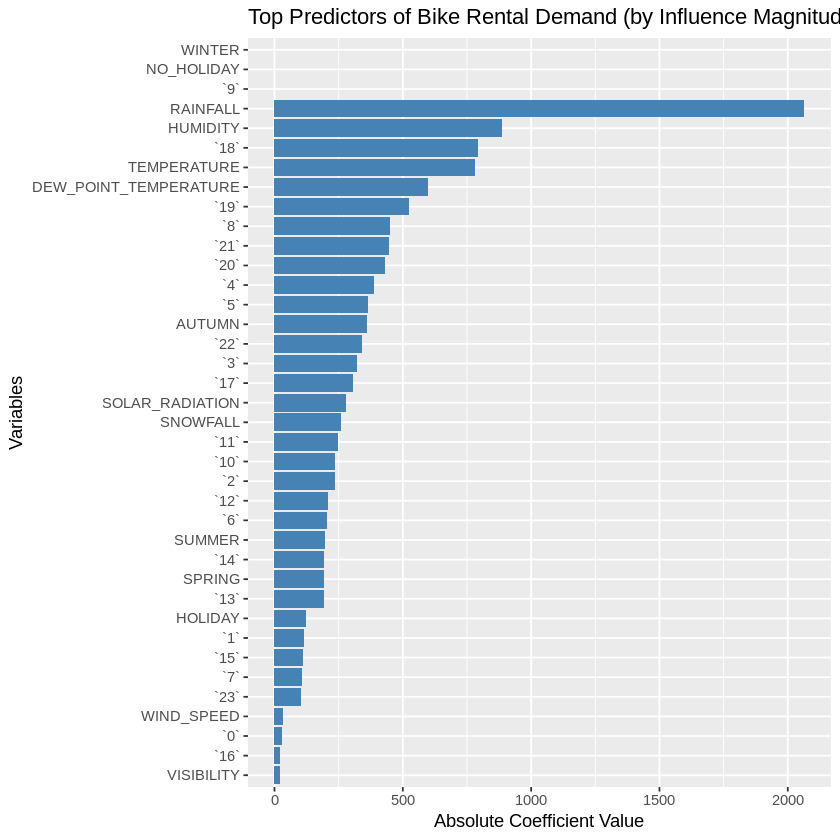

In [82]:
# Get coefficients from model and convert to dataframe
coeff_df <- as.data.frame(coef(lm_model_all))
coeff_df$variable <- rownames(coeff_df)
colnames(coeff_df)[1] <- "coefficient"

# Remove intercept
coeff_df <- coeff_df %>%
  filter(variable != "(Intercept)")

# Create column for absolute magnitude
coeff_df <- coeff_df %>%
  mutate(abs_coefficient = abs(coefficient)) %>%
  arrange(desc(abs_coefficient))

# Plot absolute coefficients (only magnitude of influence)
library(ggplot2)

ggplot(coeff_df, aes(x = reorder(variable, abs_coefficient), y = abs_coefficient)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top Predictors of Bike Rental Demand (by Influence Magnitude)",
    x = "Variables",
    y = "Absolute Coefficient Value"
  )


####Refine the Baseline Regression Models

TASK: Add polynomial terms

TASK: Add interactions terms

TASK: Add regularizations terms

TASK: Experiment to search for improved models

In [90]:
# Load necessary libraries
library(tidyverse)
library(yardstick)

# Fit polynomial model with higher-degree terms (no interactions yet)
lm_poly <- lm(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) +
                                    poly(HUMIDITY, 4) +
                                    poly(WIND_SPEED, 2) +
                                    poly(RAINFALL, 2),
              data = train_data)

# View summary
summary(lm_poly)

# Predict on test data
test_data$prediction_poly <- predict(lm_poly, newdata = test_data)

# Ensure no negative predictions
test_data$prediction_poly[test_data$prediction_poly < 0] <- 0

# Evaluate using yardstick
results_poly <- test_data %>%
  select(RENTED_BIKE_COUNT, prediction_poly) %>%
  rename(truth = RENTED_BIKE_COUNT, prediction = prediction_poly)

rmse_poly <- rmse(results_poly, truth, prediction) %>% pull(.estimate)
rsq_poly <- rsq(results_poly, truth, prediction) %>% pull(.estimate)

# Print
cat("Polynomial Model RMSE:", rmse_poly, "\n")
cat("Polynomial Model R-squared:", rsq_poly, "\n")



Call:
lm(formula = RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 
    4) + poly(WIND_SPEED, 2) + poly(RAINFALL, 2), data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1202.53  -282.34   -68.32   199.84  2153.69 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              734.927      5.772 127.333  < 2e-16 ***
poly(TEMPERATURE, 6)1  30799.702    473.443  65.055  < 2e-16 ***
poly(TEMPERATURE, 6)2  -6813.924    481.301 -14.157  < 2e-16 ***
poly(TEMPERATURE, 6)3  -9163.692    462.306 -19.822  < 2e-16 ***
poly(TEMPERATURE, 6)4  -3007.710    462.602  -6.502 8.55e-11 ***
poly(TEMPERATURE, 6)5   -473.459    464.080  -1.020  0.30767    
poly(TEMPERATURE, 6)6   1029.730    466.344   2.208  0.02727 *  
poly(HUMIDITY, 4)1    -15022.659    535.516 -28.053  < 2e-16 ***
poly(HUMIDITY, 4)2     -8801.257    501.691 -17.543  < 2e-16 ***
poly(HUMIDITY, 4)3       167.862    489.824   0.343  0.73184    
poly(HUMIDITY, 4)4

Polynomial Model RMSE: 442.6296 
Polynomial Model R-squared: 0.5123239 


In [91]:
# Fit polynomial + interaction model
lm_poly_interact <- lm(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) +
                                         poly(HUMIDITY, 4) +
                                         poly(WIND_SPEED, 2) +
                                         poly(RAINFALL, 2) +
                                         HUMIDITY*TEMPERATURE +
                                         RAINFALL*HUMIDITY,
                       data = train_data)

# View summary
summary(lm_poly_interact)

# Predict on test data
test_data$prediction_poly_int <- predict(lm_poly_interact, newdata = test_data)
test_data$prediction_poly_int[test_data$prediction_poly_int < 0] <- 0

# Evaluate
results_poly_int <- test_data %>%
  select(RENTED_BIKE_COUNT, prediction_poly_int) %>%
  rename(truth = RENTED_BIKE_COUNT, prediction = prediction_poly_int)

rmse_poly_int <- rmse(results_poly_int, truth, prediction) %>% pull(.estimate)
rsq_poly_int <- rsq(results_poly_int, truth, prediction) %>% pull(.estimate)

cat("Polynomial + Interaction Model RMSE:", rmse_poly_int, "\n")
cat("Polynomial + Interaction Model R-squared:", rsq_poly_int, "\n")



Call:
lm(formula = RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 
    4) + poly(WIND_SPEED, 2) + poly(RAINFALL, 2) + HUMIDITY * 
    TEMPERATURE + RAINFALL * HUMIDITY, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1265.44  -256.44   -69.43   173.07  2145.02 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1442.46      63.56  22.696  < 2e-16 ***
poly(TEMPERATURE, 6)1  54844.23    1582.06  34.666  < 2e-16 ***
poly(TEMPERATURE, 6)2  -5261.49     481.70 -10.923  < 2e-16 ***
poly(TEMPERATURE, 6)3 -11847.82     484.18 -24.470  < 2e-16 ***
poly(TEMPERATURE, 6)4  -4183.51     459.83  -9.098  < 2e-16 ***
poly(TEMPERATURE, 6)5   -666.78     454.88  -1.466    0.143    
poly(TEMPERATURE, 6)6    740.23     457.37   1.618    0.106    
poly(HUMIDITY, 4)1      8226.78    1547.91   5.315 1.10e-07 ***
poly(HUMIDITY, 4)2     -7872.20     496.52 -15.855  < 2e-16 ***


Polynomial + Interaction Model RMSE: 432.8967 
Polynomial + Interaction Model R-squared: 0.5331159 


In [93]:
# Load glmnet
install.packages("glmnet")

library(glmnet)

# Prepare model matrix (poly + interactions)
X <- model.matrix(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) +
                                     poly(HUMIDITY, 4) +
                                     poly(WIND_SPEED, 2) +
                                     poly(RAINFALL, 2) +
                                     HUMIDITY*TEMPERATURE +
                                     RAINFALL*HUMIDITY, data = train_data)[, -1]

y <- train_data$RENTED_BIKE_COUNT

# Fit glmnet with alpha = 0.5 (Elastic Net)
model_glmnet <- glmnet(X, y, alpha = 0.5)

# Prepare test matrix
X_test <- model.matrix(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) +
                                             poly(HUMIDITY, 4) +
                                             poly(WIND_SPEED, 2) +
                                             poly(RAINFALL, 2) +
                                             HUMIDITY*TEMPERATURE +
                                             RAINFALL*HUMIDITY, data = test_data)[, -1]

# Predict using best lambda (cross-validation can be added)
pred_glmnet <- predict(model_glmnet, newx = X_test, s = 0.01)[, 1]
pred_glmnet[pred_glmnet < 0] <- 0

# Evaluate
results_glmnet <- tibble(truth = test_data$RENTED_BIKE_COUNT,
                         prediction = pred_glmnet)

rmse_glmnet <- rmse(results_glmnet, truth, prediction) %>% pull(.estimate)
rsq_glmnet <- rsq(results_glmnet, truth, prediction) %>% pull(.estimate)

cat("GLMNET Model RMSE:", rmse_glmnet, "\n")
cat("GLMNET Model R-squared:", rsq_glmnet, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-9



GLMNET Model RMSE: 514.9949 
GLMNET Model R-squared: 0.513412 


In [94]:
# Store all model performances in a single dataframe
performance_df <- tibble(
  Model = c("Poly Only", "Poly + Interact", "GLMNET (alpha=0.5, s=0.01)"),
  RMSE = c(rmse_poly, rmse_poly_int, rmse_glmnet),
  R_squared = c(rsq_poly, rsq_poly_int, rsq_glmnet)
)

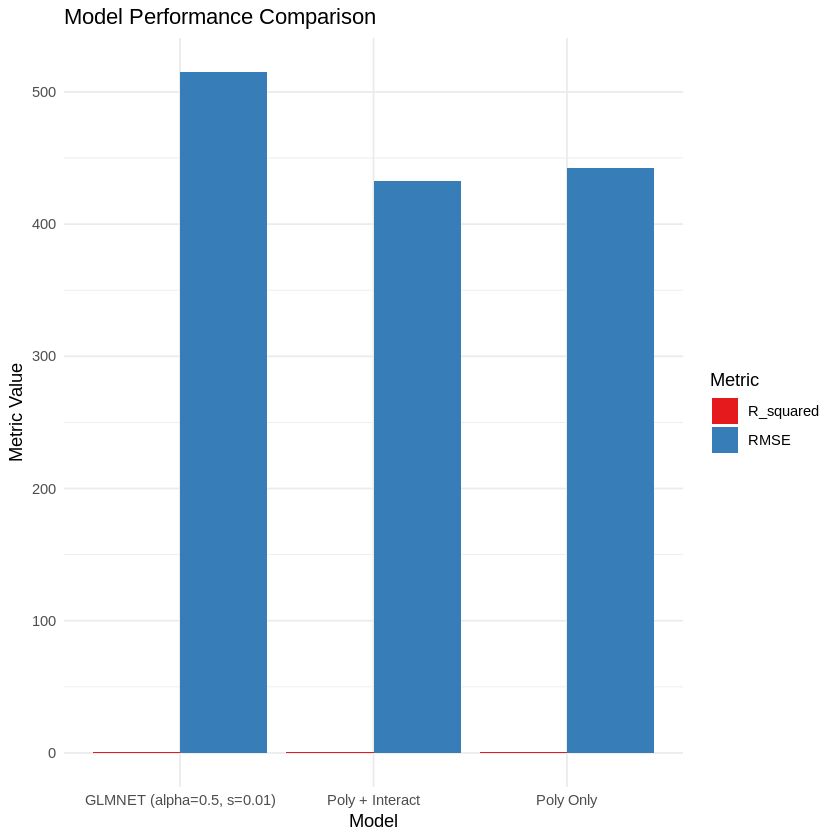

In [95]:
library(tidyr)
library(ggplot2)

# Convert wide to long format for grouped bar chart
performance_long <- performance_df %>%
  pivot_longer(cols = c(RMSE, R_squared), names_to = "Metric", values_to = "Value")

# Plot grouped bar chart
ggplot(performance_long, aes(x = Model, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Model Performance Comparison", x = "Model", y = "Metric Value") +
  scale_fill_brewer(palette = "Set1") +
  theme_minimal()


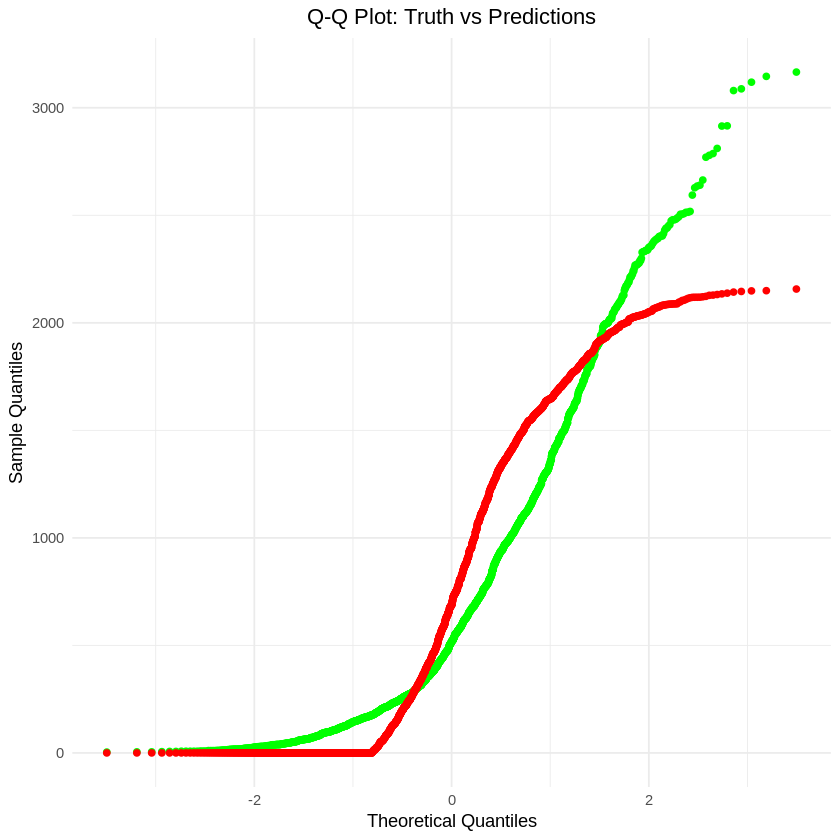

In [96]:
# Ensure you have ggplot2 loaded
library(ggplot2)

# Use results_glmnet or any other predictions you have
ggplot(results_glmnet) +
  stat_qq(aes(sample = truth), color = 'green') +
  stat_qq(aes(sample = prediction), color = 'red') +
  labs(title = "Q-Q Plot: Truth vs Predictions",
       x = "Theoretical Quantiles", y = "Sample Quantiles") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))
